<h1 align="center">Introduction to the Allen Brain Observatory</h1> 
<h3 align="center">Saturday, July 7, 2018</h3> 

In [131]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  

<p>We begin by importing the `BrainObservatoryCache` class and instantiating it, pointing it to our manifest file.

<p>`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data.
</div>


In [213]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json'

boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The Brain Observatory Cache allows us to describe the dimensions of the data in the dataset
</div>


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Let's take a look at the available depths, cre lines, areas, and stimuli available in the Brain Observatory datsset.
</div>

In [214]:
# list of all targeted areas
boc.get_all_targeted_structures()

[u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

In [215]:
# list of all imaging depths
boc.get_all_imaging_depths()

[175, 265, 275, 300, 320, 325, 335, 350, 365, 375, 435]

In [216]:
# list of all cre driver lines 
boc.get_all_cre_lines()


[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre']

In [217]:
# list of all stimuli
boc.get_all_stimuli()


['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Experiment containers</h2>
<p>The experiment container describes a set of 3 experiment sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of cells). Each experiment container has a unique ID number.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Choose a visual area and Cre line from the lists above
</div>

In [218]:
visual_area = 'VISal'
cre_line ='Cux2-CreERT2'

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Get the list of all the experiment containers for that area and Cre line combination.
</div>

In [219]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

In [220]:
pd.DataFrame(exps)

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,225036,False,511510797,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225036,[],VISal
1,Cux2-CreERT2,233215,False,511854338,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-233215,[],VISal
2,Cux2-CreERT2,222426,False,511510715,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],VISal
3,Cux2-CreERT2,222425,False,511510695,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],VISal
4,Cux2-CreERT2,228379,False,511510867,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-228379,[],VISal
5,Cux2-CreERT2,228378,False,511511052,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-228378,[],VISal
6,Cux2-CreERT2,229105,False,511510998,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-229105,[Epileptiform Events],VISal
7,Cux2-CreERT2,273576,False,555700037,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-273576,[],VISal
8,Cux2-CreERT2,273576,False,556936291,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-273576,[],VISal
9,Cux2-CreERT2,222420,False,511510664,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISal


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.
</div>

In [221]:
experiment_container_id = 511510736

In [222]:
boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

[{'acquisition_age_days': 102,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501474098,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 104,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501704220,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 103,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501559087,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'sessio

In [223]:
boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])

[{'acquisition_age_days': 103,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501559087,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'}]

In [224]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                       stimuli=['natural_scenes'])[0]['id']
print session_id

501559087


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Ophys Experiment data</h2>
<p> This gives us access to everything in the NWB file for a single imaging session
</div>

In [225]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [226]:
data_set.get

array([517473350, 517473341, 517473313, 517473255, 517471959, 517471769,
       517473059, 517471997, 517472716, 517471919, 517472989, 517472293,
       517473115, 517472454, 517473020, 517472734, 517474366, 587377483,
       517471708, 587377366, 587377223, 517474444, 517474437, 517473105,
       517472300, 517472326, 517472708, 517472215, 517472712, 517472360,
       517472399, 517472197, 517472582, 517472190, 517473926, 587377518,
       517471931, 517472637, 517472416, 517471658, 517472724, 517472684,
       517471664, 587377211, 517473947, 587377064, 517472063, 587377621,
       517473080, 517472553, 517473001, 517474078, 517471794, 517471674,
       517473916, 517471803, 517472592, 517473014, 517474459, 517472241,
       517472720, 517472534, 517472054, 587377662, 517474012, 517474020,
       517473653, 517472007, 517472645, 517472211, 517472677, 517472731,
       517472621, 517472442, 587377204, 517473027, 517472818, 517473304,
       517474121, 517473034, 517472909, 517473624, 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Maximum projection</h2>
<p> This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.
</div>

In [227]:
max_projection = data_set.get_max_projection()

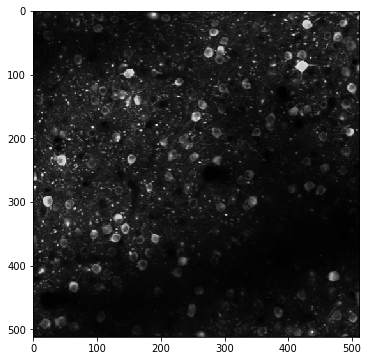

In [228]:
fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection, cmap='gray')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>ROI Masks</h2>
<p>These are all of the segmented masks for cell bodies in this experiment.
</div>

In [150]:
rois = data_set.get_roi_mask_array()

In [229]:
print rois.shape
print "Number of cells:", rois.shape[0]

(174, 512, 512)
Number of cells: 174


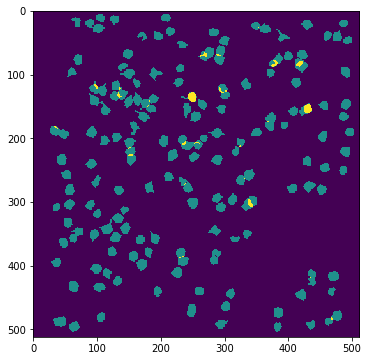

In [230]:
plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>DF/F Traces</h2>
<p>There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 
</div>

In [153]:
ts, dff = data_set.get_dff_traces()

In [186]:
dff.shape

(174, 113888)

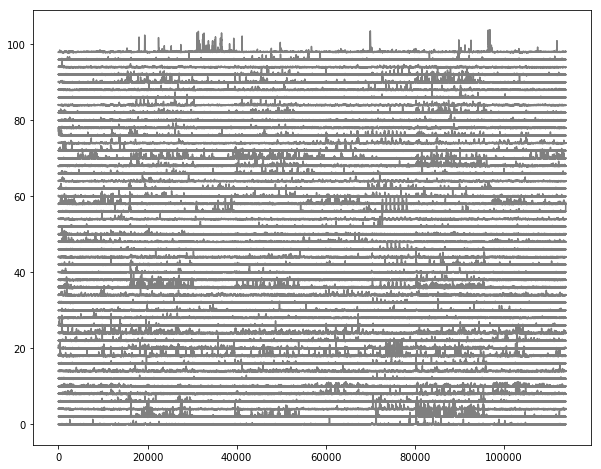

In [231]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>It looks like different cells are active at different times. What could that be about?
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Stimulus epochs</h2>
<p>Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs
</div>

In [156]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [232]:
stim_epoch

,stimulus,start,end
0,static_gratings,746,15195
1,natural_scenes,16099,30550
2,spontaneous,30700,39580
3,natural_scenes,39581,54049
4,static_gratings,54952,69402
5,natural_movie_one,70306,79337
6,natural_scenes,80240,96125
7,static_gratings,97405,113661


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Overlap stimulus epochs on the DFF traces
</div>

In [74]:
stim_epoch.stimulus.unique()

array([u'static_gratings', u'natural_scenes', u'spontaneous',
       u'natural_movie_one'], dtype=object)

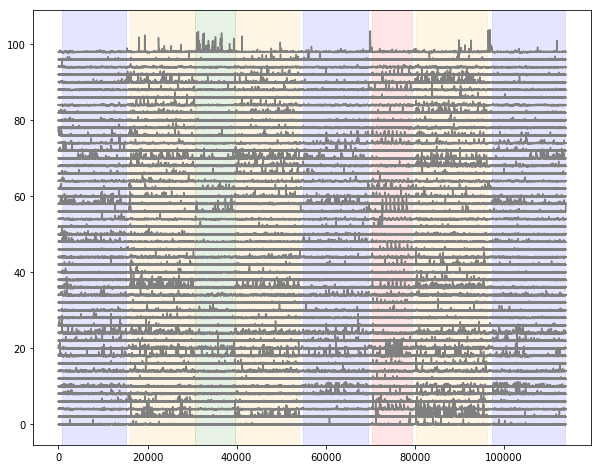

In [233]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Details of stimulus presentation per trial can be found in the stimulus_table and the images and movies presented can be found in the stimulus_template
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Stimulus Table</h2>
<p>For each stimulus there is a stimulus table with information about the condition and timing of each trial. 
</div>

In [159]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [234]:
natural_scene_table.head()

,frame,start,end
0,81,16099,16106
1,33,16107,16114
2,76,16114,16121
3,13,16122,16129
4,56,16129,16136


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Stimulus Template</h2>
<p>The images and movies presented during the session area also included in the NWB file as the stimulus template. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.
</div>

In [161]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [235]:
natural_scene_template.shape

(118, 918, 1174)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Look at the scene presented for the first trial
</div>

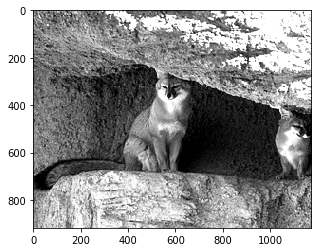

In [239]:
scene_number = natural_scene_table.frame.loc[3]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

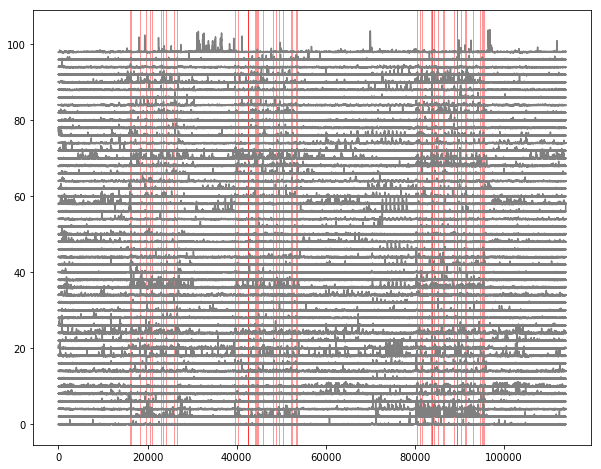

In [240]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Running speed</h2>
<p>The running speed of the animal on the rotating disk during the entire session.
</div>

In [241]:
dxcm, tsd = data_set.get_running_speed()

Text(0,0.5,u'Running speed (cm/s)')

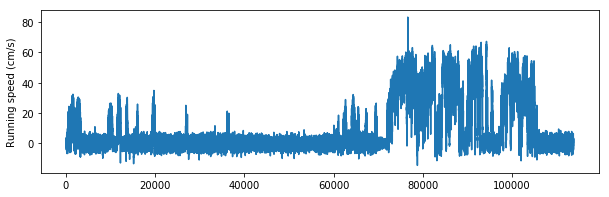

In [242]:
fig = plt.figure(figsize=(10,3))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")

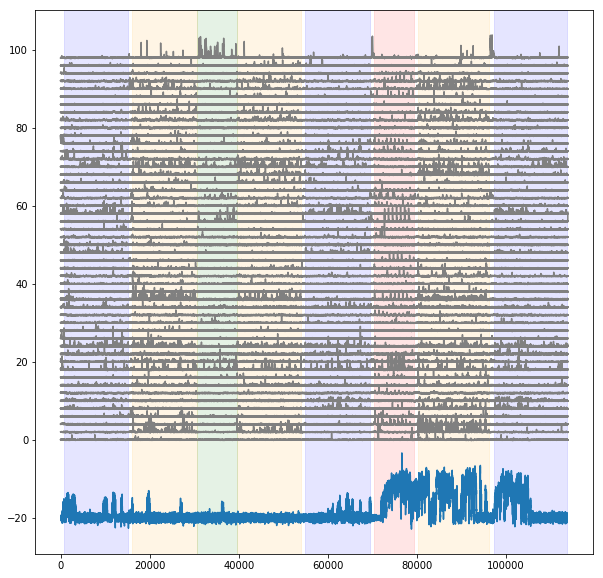

In [243]:
fig = plt.figure(figsize=(10,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Cell Specimens Table</h2>
<p>The `Cell Specimens Table` is a table of metadata and derived metrics computed for each ROI in the entire dataset. This is accessible for direct download from the website and through the sdk.
</div>

In [94]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [95]:
cell_specimens.shape

(39796, 60)

In [96]:
cell_specimens.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,False,VISpm,517394847,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.852081,511498500,False,0.468690,0.275754,NaN,...,503292439,0.348821,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,False,VISpm,517394850,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.730537,0.342070,NaN,...,503292439,0.298012,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,False,VISpm,517394854,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.692137,511498500,False,0.319382,0.215510,NaN,...,503292439,0.380637,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,False,VISpm,517394858,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,NaN,NaN,0.76123,...,503292439,NaN,0.4655,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,False,VISpm,517394862,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.391861,0.742900,NaN,...,503292439,0.330543,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>There are 60 columns in this dataframe. Some are metadata, including experiment id, cell_specimen_id, Cre line, targeted area, etc. Others are derived metrics including orientation selectivity, preferred stimulus conditions, receptive field size and location, response reliability, etc. The details on how these are computed are in the White Paper in the `Documentation` Tab on the website. 
</div>

In [97]:
cell_specimens.keys()

Index([u'all_stim', u'area', u'cell_specimen_id', u'donor_full_genotype',
       u'dsi_dg', u'experiment_container_id', u'failed_experiment_container',
       u'g_dsi_dg', u'g_osi_dg', u'g_osi_sg', u'image_sel_ns',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns',
       u'p_run_mod_dg', u'p_run_mod_ns', u'p_run_mod_sg', u'p_sg',
       u'peak_dff_dg', u'peak_dff_ns', u'peak_dff_sg', u'pref_dir_dg',
       u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg', u'pref_sf_sg',
       u'pref_tf_dg', u'reliability_dg', u'reliability_nm1_a',
       u'reliability_nm1_b', u'reliability_nm1_c', u'reliability_nm2',
       u'reliability_nm3', u'reliability_ns', u'reliability_sg',
       u'rf_area_off_lsn', u'rf_area_on_lsn', u'rf_center_off_x_lsn',
       u'rf_center_off_y_lsn', u'rf_center_on_x_lsn', u'rf_center_on_y_lsn',
       u'rf_chi2_lsn', u'rf_distance_lsn', u'rf_overlap_index_lsn',
       u'run_mod_dg', u'run_mod_ns', u'run_mod_sg', u'sfdi_sg', u'specimen_id',
       u'tfdi_

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Let's find the cells from our experiment above
</div>

In [98]:
subset = cell_specimens[cell_specimens.experiment_container_id==experiment_container_id]

In [99]:
len(subset)

225

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Why are there more cells that we saw in the ROI masks above?
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Let's look at the cells in this experiment that have image #22 (below) as their preferred image.
</div>

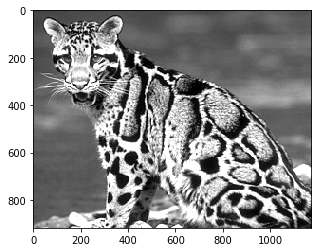

In [125]:
plt.imshow(natural_scene_template[22,:,:], cmap='gray')

In [114]:
subset[(subset.p_ns<0.05)&(subset.pref_image_ns==22)].cell_specimen_id

6720     517472708
6937     517474078
35241    587377366
Name: cell_specimen_id, dtype: int64

In [126]:
cell_index = data_set.get_cell_specimen_indices([587377366])[0]

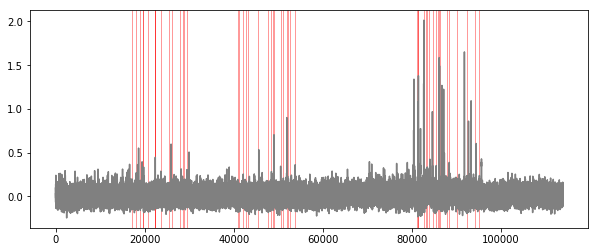

In [127]:
fig = plt.figure(figsize=(10,4))
plt.plot(dff[cell_index,:], color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

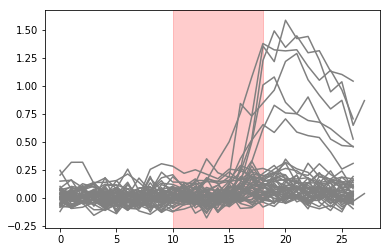

In [130]:
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-10:stim_subset.end.iloc[i]+10], color='gray')
plt.axvspan(10,18, color='red',alpha=0.2)